<a href="https://colab.research.google.com/github/sumaiya08/medicaldata/blob/master/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Access data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

In [74]:
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
project_id='eicudata'

Frequency of hospital admission

In [0]:
%%bigquery --project $project_id freq
select uniquepid, count(patienthealthsystemstayid) as numvisit
from `physionet-data.eicu_crd.patient` 
group by uniquepid
order by uniquepid

In [77]:
freq
print('Total number of patients -', len(freq))

Total number of patients - 139367


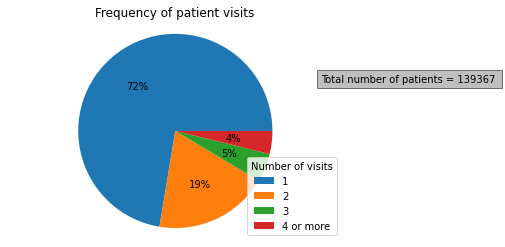

In [78]:
a=freq.numvisit[freq.numvisit==1].count()
b=freq.numvisit[freq.numvisit==2].count()
c=freq.numvisit[freq.numvisit==3].count()
d=freq.numvisit[freq.numvisit>=4].count()
visits = [a,b,c,d]


labels = '1','2','3','4 or more'
plt.pie(visits,autopct='%1.0f%%')
plt.title('Frequency of patient visits')
plt.legend(labels,title='Number of visits', loc ="lower right")
plt.text(1.5,0.5,'Total number of patients = 139367 ',bbox=dict(facecolor='grey',alpha=0.5))
plt.axis('equal')
plt.show()

In [0]:
%%bigquery --project $project_id patient
select * from `physionet-data.eicu_crd.patient`;



1628 3933 4553 5164 5832 7270 10460 15532 18709 20398 22222 21242 19058 15833 6437
35 92 108 148 191 217 394 677 878 1145 1307 1350 1406 1319 644


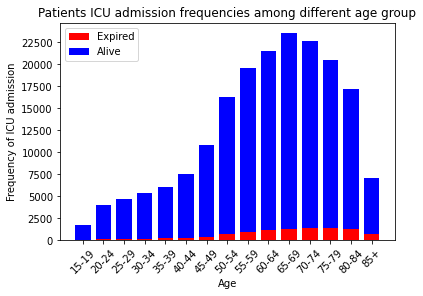

In [80]:
ages=["15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80-84","85+"]
alive = patient[(patient.unitdischargestatus=='Alive')]
#alive.dtypes
#alive['age'] = pd.to_numeric(alive['age'])
#alive.astype({"age":int})df["a"] = pd.to_numeric(df["a"])
a1 = alive.age[(alive.age>='15') & (alive.age<'20')].count()
a2 = alive.age[(alive.age>='20') & (alive.age<'25')].count()
a3 = alive.age[(alive.age>='25') & (alive.age<'30')].count()
a4 = alive.age[(alive.age>='30') & (alive.age<'35')].count()
a5 = alive.age[(alive.age>='35') & (alive.age<'40')].count()
a6 = alive.age[(alive.age>='40') & (alive.age<'45')].count()
a7 = alive.age[(alive.age>='45') & (alive.age<'50')].count()
a8 = alive.age[(alive.age>='50') & (alive.age<'55')].count()
a9 = alive.age[(alive.age>='55') & (alive.age<'60')].count()
a10 = alive.age[(alive.age>='60') & (alive.age<'65')].count()
a11 = alive.age[(alive.age>='65') & (alive.age<'70')].count()
a12 = alive.age[(alive.age>='70') & (alive.age<'75')].count()
a13 = alive.age[(alive.age>='75') & (alive.age<'80')].count()
a14 = alive.age[(alive.age>='80') & (alive.age<'85')].count()
a15 = alive.age[(alive.age>='85') & (alive.age=='> 89')].count()
print(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15)
values = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15]

#a=freq.numvisit[freq.numvisit==1].count()
#alive = alive.set_index("unitdischargestatus")
#alive = alive.drop("Expired", axis=0)
expired = patient[patient.unitdischargestatus=='Expired']
e1 = expired.age[(expired.age>='15') & (expired.age<'20')].count()
e2 = expired.age[(expired.age>='20') & (expired.age<'25')].count()
e3 = expired.age[(expired.age>='25') & (expired.age<'30')].count()
e4 = expired.age[(expired.age>='30') & (expired.age<'35')].count()
e5 = expired.age[(expired.age>='35') & (expired.age<'40')].count()
e6 = expired.age[(expired.age>='40') & (expired.age<'45')].count()
e7 = expired.age[(expired.age>='45') & (expired.age<'50')].count()
e8 = expired.age[(expired.age>='50') & (expired.age<'55')].count()
e9 = expired.age[(expired.age>='55') & (expired.age<'60')].count()
e10 = expired.age[(expired.age>='60') & (expired.age<'65')].count()
e11 = expired.age[(expired.age>='65') & (expired.age<'70')].count()
e12 = expired.age[(expired.age>='70') & (expired.age<'75')].count()
e13 = expired.age[(expired.age>='75') & (expired.age<'80')].count()
e14 = expired.age[(expired.age>='80') & (expired.age<'85')].count()
e15 = expired.age[(expired.age>='85') & (expired.age=='> 89')].count()
print(e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15)
values1 = [e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15]

#print(alive)
#zero = alive.groupby('uniquepid')
#len(zero.count())
#zero1 = expired.groupby('uniquepid')
#len(zero1.count())
#zero = alive.unitdischargestatus.count()

#zero1=expired.unitdischargestatus.count()
#values = [zero,zero1]
N=15
ind = np.arange(N)
#index = np.arange(len(ages))
#score_label = np.arange(0,12500,2500)
width = 0.75
p1 = plt.bar(ages,values1,width,color="red",label="Expired")
p2 = plt.bar(ages,values,width,color="blue",label="Alive",bottom=values1)
plt.xlabel('Age')
plt.ylabel('Frequency of ICU admission')
plt.title('Patients ICU admission frequencies among different age group')
plt.xticks(ind, ages,rotation =45)
#plt.set_xticklabels(ages, rotation = 45, ha="right")
plt.yticks(np.arange(0, 25000, 2500))
plt.legend((p1[0], p2[0]), ('Expired', 'Alive'))
plt.show()


In [81]:
expired
female = expired[(expired.gender=='Female')]
print(len(female))
male = expired[(expired.gender=='Male')]
f1 = female.age[(female.age>='15')&(female.age<'20')].count()
f2 = female.age[(female.age>='20')&(female.age<'25')].count()
f3 = female.age[(female.age>='25')&(female.age<'30')].count()
f4 = female.age[(female.age>='30')&(female.age<'35')].count()
f5 = female.age[(female.age>='35')&(female.age<'40')].count()
f6 = female.age[(female.age>='40')&(female.age<'45')].count()
f7 = female.age[(female.age>='45')&(female.age<'50')].count()
f8 = female.age[(female.age>='50')&(female.age<'55')].count()
f9 = female.age[(female.age>='55')&(female.age<'60')].count()
f10 = female.age[(female.age>='60')&(female.age<'65')].count()
f11 = female.age[(female.age>='65')&(female.age<'70')].count()
f12 = female.age[(female.age>='70')&(female.age<'75')].count()
f13 = female.age[(female.age>='75')&(female.age<'80')].count()
f14 = female.age[(female.age>='80')&(female.age<'85')].count()
f15 = female.age[(female.age>='85')&(female.age=='> 89')].count()

print(f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)
mor_fem = [f1/len(female),f2/len(female),f3/len(female),f4/len(female),f5/len(female),f6/len(female),f7/len(female),f8/len(female),f9/len(female),f10/len(female),f11/len(female),f12/len(female),f13/len(female),f14/len(female),f15/len(female)]
print(mor_fem)

m1 = male.age[(male.age>='15')&(male.age<'20')].count()
m2 = male.age[(male.age>='20')&(male.age<'25')].count()
m3 = male.age[(male.age>='25')&(male.age<'30')].count()
m4 = male.age[(male.age>='30')&(male.age<'35')].count()
m5 = male.age[(male.age>='35')&(male.age<'40')].count()
m6 = male.age[(male.age>='40')&(male.age<'45')].count()
m7 = male.age[(male.age>='45')&(male.age<'50')].count()
m8 = male.age[(male.age>='50')&(male.age<'55')].count()
m9 = male.age[(male.age>='55')&(male.age<'60')].count()
m10 = male.age[(male.age>='60')&(male.age<'65')].count()
m11 = male.age[(male.age>='65')&(male.age<'70')].count()
m12 = male.age[(male.age>='70')&(male.age<'75')].count()
m13 = male.age[(male.age>='75')&(male.age<'80')].count()
m14 = male.age[(male.age>='80')&(male.age<'85')].count()
m15 = male.age[(male.age>='85')&(male.age=='> 89')].count()

print(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15)
mor_male = [m1/len(male),m2/len(male),m3/len(male),m4/len(male),m5/len(male),m6/len(male),m7/len(male),m8/len(male),m9/len(male),m10/len(male),m11/len(male),m12/len(male),m13/len(male),m14/len(male),m15/len(male)]
print(mor_male)


4965
12 30 45 56 76 99 156 297 383 472 626 573 640 633 366
[0.002416918429003021, 0.006042296072507553, 0.00906344410876133, 0.011278952668680765, 0.015307150050352467, 0.019939577039274924, 0.03141993957703928, 0.05981873111782477, 0.0771399798590131, 0.09506545820745217, 0.12608257804632428, 0.11540785498489425, 0.12890231621349446, 0.12749244712990937, 0.07371601208459215]
23 62 63 92 115 118 238 380 495 673 681 777 765 685 266
[0.003883167313861219, 0.010467668411278068, 0.010636501772750296, 0.015532669255444876, 0.019415836569306094, 0.019922336653722776, 0.04018234003039001, 0.06415667735944623, 0.08357251392875233, 0.11362485227080871, 0.11497551916258653, 0.13118352186392032, 0.1291575215262536, 0.11565085260847544, 0.04490967415161236]


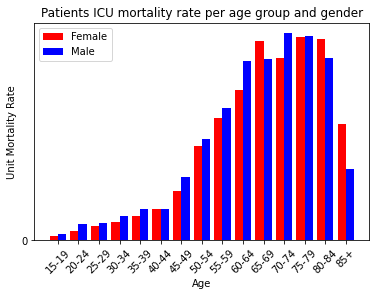

In [82]:
N=15
ind = np.arange(N)
#index = np.arange(len(ages))
#score_label = np.arange(0,12500,2500)
width = 0.4
p1 = plt.bar(ind,mor_fem,width,color="red",label="Female")
p2 = plt.bar(ind+width,mor_male,width,color="blue",label="Male")
plt.xlabel('Age')
plt.ylabel('Unit Mortality Rate')
plt.title('Patients ICU mortality rate per age group and gender')
plt.xticks(ind + width/2, ages,rotation =45)
#plt.set_xticklabels(ages, rotation = 45, ha="right")
plt.yticks(np.arange(0.0, 0.005))
plt.legend((p1[0], p2[0]), ('Female', 'Male'))
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


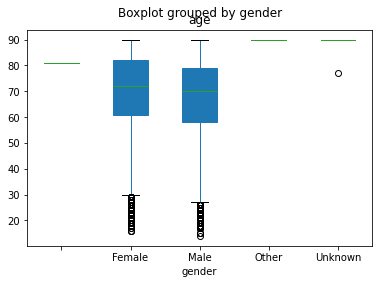

In [83]:
#expired.boxplot(column='age',by='gender')
expired['age'].replace({'> 89': '90'}, inplace=True)
expired['age'] = pd.to_numeric(expired['age'])
#print(expired)
#expired.dtypes
#expired.drop(expired.age=='> 89')
#expired['age'] = pd.to_numeric(expired['age'])

expired.boxplot(column='age',by='gender',patch_artist = True, grid = False)
#bp.ylabel('Age')

Age distribution of patients who died in ICU based on gender 


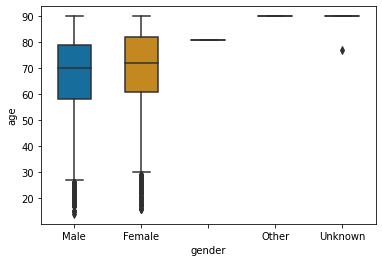

In [84]:
bplot = sns.boxplot(y='age', x='gender', 
                 data=expired, 
                 width=0.5,
                 palette="colorblind",)

In [0]:
%%bigquery --project $project_id race
select uniquepid, ethnicity
from `physionet-data.eicu_crd.patient` 
group by uniquepid,ethnicity
order by uniquepid;

In [86]:
race

,uniquepid,ethnicity
0,002-10009,Caucasian
1,002-10018,Caucasian
2,002-10034,Caucasian
3,002-10050,Caucasian
4,002-10052,Caucasian
...,...,...
140095,035-9957,Caucasian
140096,035-9959,Caucasian
140097,035-996,African American
140098,035-9966,African American


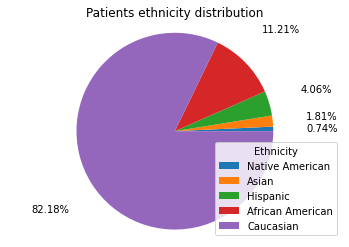

In [87]:
a=race.ethnicity[race.ethnicity=='Native American'].count()
b=race.ethnicity[race.ethnicity=='Asian'].count()
c=race.ethnicity[race.ethnicity=='Hispanic'].count()
d=race.ethnicity[race.ethnicity=='African American'].count()
e=race.ethnicity[race.ethnicity=='Caucasian'].count()
#f=race.ethnicity[race.ethnicity==' '].count()

races = [a,b,c,d,e]


labels = 'Native American','Asian','Hispanic','African American','Caucasian'
plt.pie(races,autopct='%1.2f%%',pctdistance=1.5,labeldistance = 2)
plt.title('Patients ethnicity distribution')
plt.legend(labels,title='Ethnicity', loc ="lower right")
plt.axis('equal')
plt.show()